## Topological Fingerprints

Populating the interactive namespace from numpy and matplotlib


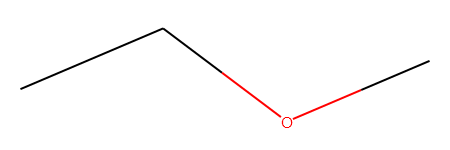

In [5]:
%pylab inline
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem.Draw import IPythonConsole #Permet de voir la molecule juste en "executant l'objet"
from rdkit.Chem import Draw #Draw.MolToImage to plot the molecule

ms = [Chem.MolFromSmiles('CCOC'), Chem.MolFromSmiles('CCO'), Chem.MolFromSmiles('COC')]
fps = [FingerprintMols.FingerprintMol(x) for x in ms]
ms[0]
#Draw.MolToImage(ms[0])

In [7]:
DataStructs.FingerprintSimilarity(fps[0],fps[1])

0.6

In [6]:
DataStructs.FingerprintSimilarity(fps[0],fps[2])

0.4

In [7]:
DataStructs.FingerprintSimilarity(fps[1],fps[2])

0.25

## MACCS Keys

In [8]:
from rdkit.Chem import MACCSkeys
fps = [MACCSkeys.GenMACCSKeys(x) for x in ms]

In [9]:
DataStructs.FingerprintSimilarity(fps[0],fps[1])

0.5

In [10]:
DataStructs.FingerprintSimilarity(fps[0],fps[2])

0.5384615384615384

In [11]:
DataStructs.FingerprintSimilarity(fps[1],fps[2])

0.21428571428571427

## Atom Pairs

In [12]:
from rdkit.Chem.AtomPairs import Pairs
ms = [Chem.MolFromSmiles('C1CCC1OCC'),Chem.MolFromSmiles('CC(C)OCC'),Chem.MolFromSmiles('CCOCC')]
pairFps = [Pairs.GetAtomPairFingerprint(x) for x in ms]

In [13]:
d = pairFps[-1].GetNonzeroElements()

In [14]:
d[541732]

1

In [15]:
d[1606690]

2

In [16]:
Pairs.ExplainPairScore(558115)

(('C', 1, 0), 3, ('C', 2, 0))

In [17]:
from rdkit import DataStructs

In [18]:
DataStructs.DiceSimilarity(pairFps[0],pairFps[1])

0.3333333333333333

In [19]:
DataStructs.DiceSimilarity(pairFps[0],pairFps[2])

0.25806451612903225

In [20]:
DataStructs.DiceSimilarity(pairFps[1],pairFps[2])

0.56

In [21]:
pairFps = [Pairs.GetAtomPairFingerprintAsBitVect(x) for x in ms]

In [22]:
from rdkit import DataStructs

In [23]:
DataStructs.DiceSimilarity(pairFps[0],pairFps[1])

0.48

In [24]:
DataStructs.DiceSimilarity(pairFps[0],pairFps[2])

0.38095238095238093

In [25]:
DataStructs.DiceSimilarity(pairFps[1],pairFps[2])

0.625

## Morgan Fingerprints

In [3]:
from rdkit.Chem import AllChem
m1 = Chem.MolFromSmiles('Cc1ccccc1')
fp1 = AllChem.GetMorganFingerprint(m1,2)
fp1
m1

In [32]:
m2 = Chem.MolFromSmiles('Cc1ncccc1')
fp2 = AllChem.GetMorganFingerprint(m2,2)
DataStructs.DiceSimilarity(fp1,fp2)

0.55

In [33]:
fp1 = AllChem.GetMorganFingerprintAsBitVect(m1,2,nBits=1024)
fp1

In [34]:
fp2 = AllChem.GetMorganFingerprintAsBitVect(m2,2,nBits=1024)
DataStructs.DiceSimilarity(fp1,fp2)

0.5185185185185185

In [35]:
m1 = Chem.MolFromSmiles('c1ccccn1')
m2 = Chem.MolFromSmiles('c1ccco1')
fp1 = AllChem.GetMorganFingerprint(m1,2)
fp2 = AllChem.GetMorganFingerprint(m2,2)
ffp1 = AllChem.GetMorganFingerprint(m1,2,useFeatures=True)
ffp2 = AllChem.GetMorganFingerprint(m2,2,useFeatures=True)

In [36]:
DataStructs.DiceSimilarity(fp1,fp2)

0.36363636363636365

In [37]:
DataStructs.DiceSimilarity(ffp1,ffp2)

0.9090909090909091